In [1]:
def myplot(r):
  import matplotlib.pyplot as plt
  plt.close()
  plt.ion()
  plt.grid()
  _ = plt.xlabel('Epoch', fontsize=12)
  _ = plt.ylabel('Loss', fontsize=12)
  plt.plot(r, linewidth=2, linestyle='-', marker='o')
  plt.show(block=False)

In [5]:
import torch

torch.set_default_dtype(torch.float)
# cuda interprets to machine language

if not torch.cuda.is_available():
  print('Bummer no GPU')
  dev = torch.device("cpu")
else:
  print('Yay: I have a GPU to keep me warm when it is cold')
  dev = torch.device("cuda:0")

# Create & initialize MLP from specification
def D2MLP(xdim, hdim, rg=False):
  A = torch.randn(xdim, hdim, device=dev, requires_grad=rg) / np.sqrt(xdim)
  b = torch.randn(hdim, device=dev, requires_grad=rg)
  w = torch.randn(hdim, device=dev, requires_grad=rg)
  return (A, b, w)

# Inference using tanh as activatrion
def D2predict(net, X):
  A, b, w = net
  return torch.tanh(X @ A + 0.1 * b) @ w   # bias is scaled by 0.1. what we get is a scalar as output

Bummer no GPU


In [7]:
# Log-loss using log1p
def loss(y, p):
  return torch.mean(torch.log1p(torch.exp(-y * p)))  # log1p is log(x) + x . double check

def D2Train(X, y, net):
  epochs, rate = 1000, 5.0
  A, b, w = net
  losses = []
  for i in range(epochs):
    p = D2predict(net, X)
    l = loss(y, p)
    losses.append(l.item())
    l.backward()
    with torch.no_grad():
      A -= rate * A.grad
      b -= rate * b.grad
      w -= rate * w.grad
      # Manually zero gradients post update
      A.grad.zero_()
      b.grad.zero_()
      w.grad.zero_()
  return losses

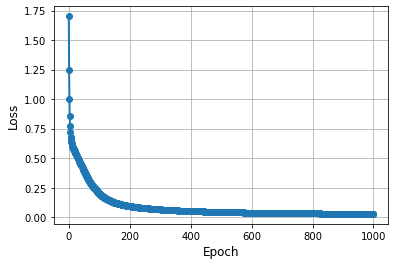

In [4]:
n, d, h = 1000, 100, 50

X = torch.randn(n, d, device=dev)  # data matrix
y = torch.tanh(torch.randn(n, device=dev))  # random targets vectors

net_gen = D2MLP(d, h, rg=False)  # network for generation. a simulator to generate targets
y_gen = D2predict(net_gen, X)  # y vectors generated

net_trn = D2MLP(d, h, rg=True)  # for training, rg = True
losses = D2Train(X, y, net_trn) 

myplot(losses)